# 基于 K-means 用户分层

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## 数据
数据里包含了产品的信息，以及用户购买产品的记录。

## 表格的第一工作区数据

In [3]:
data_offer = pd.read_excel("data/WineKMC.xlsx", sheetname=0)
data_offer.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
data_offer.head()

/home/bishi/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


## 表格的第二工作区数据

In [4]:
data_transactions = pd.read_excel("data/WineKMC.xlsx", sheetname=1)
data_transactions.columns = ["customer_name", "offer_id"]
data_transactions['n'] = 1
data_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## 合并两个工作区

In [5]:
import numpy as np

cust_compare = data_transactions.merge(data_offer, on='offer_id')

# 删除不必要的数据
cust_compare = cust_compare.drop(["campaign", "varietal", "min_qty", "discount", "origin", "past_peak"], axis=1)

# 重新数据表格，pivot table
table = pd.pivot_table(cust_compare, index='customer_name', columns='offer_id', aggfunc=np.sum, fill_value=0)
table

n                             ...                              
offer_id      1  2  3  4  5  6  7  8  9  10  ... 23 24 25 26 27 28 29 30 31 32
customer_name                                ...                              
Adams          0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Allen          0  0  0  0  0  0  0  0  1  0  ...  0  0  0  0  1  0  0  0  0  0
Anderson       0  0  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Bailey         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0  1  0  0
Baker          0  0  0  0  0  0  1  0  0  1  ...  0  0  0  0  0  0  0  0  1  0
Barnes         0  0  0  0  0  0  0  0  0  1  ...  0  0  0  0  0  0  0  0  1  0
Bell           0  1  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Bennett        0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  1  0  0  0
Brooks         0  0  1  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  0  0  0  0
Brown          0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Butler         1  0  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  1  0  1  0  0
Campbell       0  1  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Carter         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Clark          0  0  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  1  0  0  1  0
Collins        0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  1  0  0
Cook           0  0  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Cooper         0  0  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  1
Cox            0  1  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Cruz           0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Davis          0  0  0  0  0  0  0  0  0  0  ...  0  0  1  0  0  0  0  0  0  0
Diaz           0  0  0  0  0  0  1  1  0  0  ...  0  0  0  0  0  0  1  1  0  0
Edwards        0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  1  0  0  0  0  0
Evans          0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  1  0  0  0  0  0
Fisher         1  1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  1  0  1  1  0
Flores         0  0  0  0  0  0  0  0  0  0  ...  0  1  0  0  0  0  0  0  0  0
Foster         1  0  0  0  0  0  0  0  1  0  ...  1  0  0  0  0  0  0  0  0  0
Garcia         0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Gomez          0  0  0  0  0  0  0  0  0  0  ...  0  0  1  0  0  0  0  0  0  1
Gonzalez       0  0  0  0  0  0  0  0  1  0  ...  0  0  0  0  0  0  0  0  1  0
Gray           0  0  0  0  0  0  0  0  0  0  ...  0  0  0  1  0  0  0  0  0  0
...           .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
Reed           0  0  0  0  1  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Reyes          0  0  0  0  0  0  0  0  1  0  ...  1  0  0  0  0  0  0  0  0  0
Richardson     0  0  1  0  0  1  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Rivera         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Roberts        0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  1  0
Robinson       0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  1  0  0  0
Rodriguez      0  1  0  0  0  0  0  0  0  0  ...  0  0  0  1  0  0  0  0  0  0
Rogers         0  0  1  0  0  0  1  1  0  0  ...  0  0  0  0  0  0  0  0  0  0
Ross           0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
Russell        0  0  0  0  0  0  0  0  0  0  ...  0  0  0  1  0  0  0  0  0  0
Sanchez        0  0  0  1  1  0  0  0  0  0  ...  0  0  0  1  0  0  0  0  0  0
Sanders        1  0  0  1  1  1  0  0  1  0  ...  0  0  1  1  0  0  0  0  0  0
Scott          0  0  0  0  0  1  0  0  0  0  ...  1  0  0  0  0  0  0  0  0  0
Smith          0  1  0  0  0  0  0  0  0  0  ...  0  1  0  0  0  0  0  0  0  0
Stewart        0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  1  1  0  0
Sullivan       0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  0  0  0  0
Taylor         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  

## 选择 K: The Elbow Sum-of-Squares Method


$$SS = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

Text(0, 0.5, 'SS')

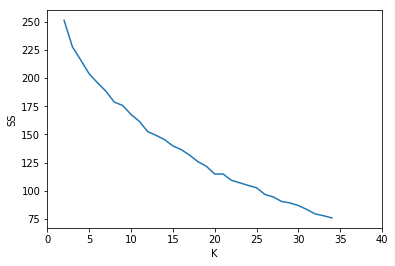

In [14]:
from sklearn.cluster import KMeans

SS = []
for k in range(2, 35):
    kmeans = KMeans(n_clusters = k).fit(table)
    SS.append(kmeans.inertia_)
    
plt.plot(range(2, 35), SS)
plt.xlim(0, 40)
plt.xlabel('K')
plt.ylabel('SS')

## 分类
选择 K 为 5

Text(0, 0.5, '# of samples')

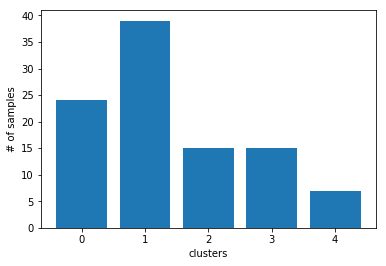

In [20]:
kmeans_5 = KMeans(n_clusters = 5).fit_predict(table)
points = list(kmeans_5)
d = {x:points.count(x) for x in points}
heights = list(d.values())
plt.bar(range(5), heights)
plt.xlabel('clusters')
plt.ylabel('# of samples')

## 利用降维的方法来可视化样本

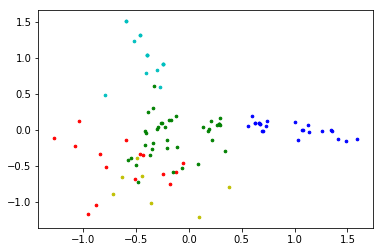

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_new = pca.fit_transform(table)

colors = ['r', 'g', 'b', 'y', 'c', 'm']

fig, ax = plt.subplots()

for i in range(5):
    ## 归属类别
    points = np.array([data_new[j] for j in range(len(data_new)) if kmeans_5[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])